# Homework Three Assignment

In [31]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Clustering Pokemon

Data source: https://www.kaggle.com/abcsds/pokemon

In [32]:
pokemon = pd.read_csv("../data/pokemon.csv", index_col=[0])
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1. Cleaning and feature engineering.
    - Drop nulls
    - One-hot encode categorical variables.
    - Do whatever else that you feel like needs to be done in order to prepare this dataset for clustering.

In [33]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [34]:
pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [35]:
pokemon.columns = pokemon.columns.str.replace(" ", "_")

In [36]:
pokemon.columns

Index(['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp._Atk', 'Sp._Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 2. Feature Selection and Engineering
    - Does it make sense to use all the features?
    - Are there some redundant features that can be dropped or combined with other ones?
    - Think hard about which features you want to keep, drop, and or transform.
    - Go ahead and make those changes to your dataset.
    

In [37]:
pokemon.drop("Name", axis=1, inplace=True)
pokemon.drop("Type_1", axis=1, inplace=True)
pokemon.drop("Type_2", axis=1, inplace=True)
pokemon.drop("Total", axis=1, inplace=True)
pokemon.drop("Generation", axis=1, inplace=True)
pokemon.drop("Legendary", axis=1, inplace=True)

#I dropped the features above because I didn't want these attributes to determine the clusters.
#I assumed that the 

In [38]:
pokemon.columns

Index(['HP', 'Attack', 'Defense', 'Sp._Atk', 'Sp._Def', 'Speed'], dtype='object')

### 3. Modeling 
    - Using KMeans, cluster the standardized data on a range of K from 2-15.
    - Plot the K values versus the inertia and silhouette scores.
    - Use those plots to determine the K value which produces the best model.
    - Fit a KMeans on the data using the best K value and create cluster labels from the data.

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0, 0.5, 'Silhouette Scores')

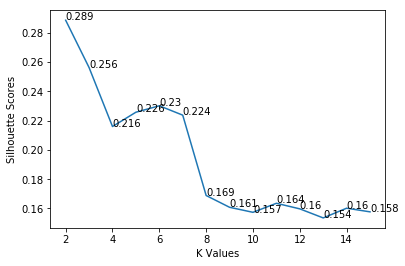

In [39]:
X = pokemon.copy()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Intialize scaler
ss = StandardScaler()

#Fit and transform scaler on data
Xs = ss.fit_transform(X)

krange = range(2, 16)

sscores = []

for i in krange:
    model = KMeans(i)
    model.fit(Xs)
    labels = model.labels_
    score = silhouette_score(Xs, labels)
    sscores.append(score)
    
plt.plot(krange, sscores)
for i in range(len(krange)):
    s = round(sscores[i], 3)
    k = krange[i]
    plt.annotate(str(s), xy = (k, s))
plt.xlabel("K Values")
plt.ylabel("Silhouette Scores")

In [40]:
sorted(zip(sscores, krange), reverse=True)[0]

(0.2885765037105727, 2)

Text(0, 0.5, 'Inertia Scores')

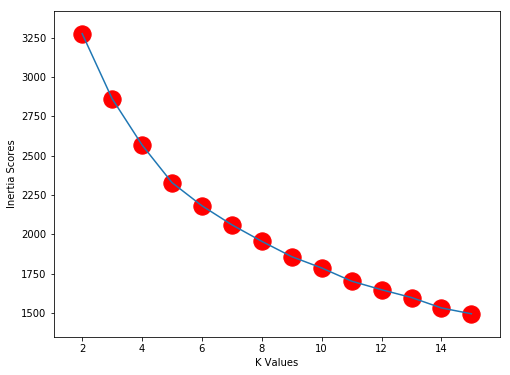

In [41]:
krange = range(2, 16)

iscores = []

for i in krange:
    model = KMeans(i)
    model.fit(Xs)
    score = model.inertia_
    iscores.append(score)

plt.figure(figsize=(8,6))
plt.plot(krange, iscores)
plt.scatter(krange, iscores, c="r", s=300)
plt.xlabel("K Values")
plt.ylabel("Inertia Scores")

In [42]:
km5 = KMeans(5, random_state=1)
km5.fit(Xs)
labs5 = km5.labels_
pd.value_counts(labs5)

1    282
2    196
0    119
4    104
3     99
dtype: int64

In [43]:
X.groupby(labs5).mean()

,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed
0,89.470588,118.420168,92.689076,120.966387,98.588235,98.176471
1,50.358156,54.159574,51.741135,48.258865,49.131206,49.173759
2,67.964286,81.612245,66.780612,78.913265,73.581633,92.045918
3,106.141414,89.505051,76.353535,77.757576,80.171717,55.747475
4,64.711538,86.336538,123.125000,68.144231,92.076923,53.000000


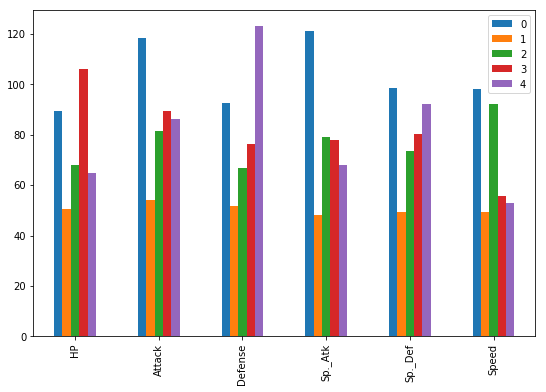

In [44]:
X.groupby(labs5).mean().T.plot(kind = "bar", figsize = (9,6))

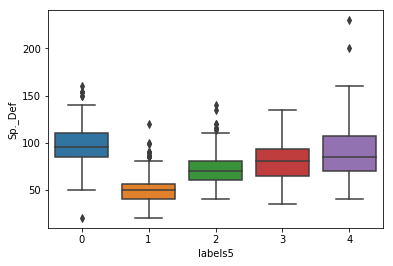

In [45]:
import seaborn as sb

X["labels5"] = labs5
sb.boxplot(x = "labels5", y = "Sp._Def", data=X)

### 4. Cluster Interpretation
    - This is the fun part!
    - Your task is to add context to those K cluster values.
    - Use data visualization to show the differences among the clusters of pokemon.
    - Get creative here and explore a variety of data viz techniques.
    - When you're done, write an one sentence description of each cluster in your data.

Group 0:
Highest in attack, special attack, special defense, and speed
2nd highest in hit power defense

Group 1:
Lowest in all categories

Group 2:
Middle range in all categories except speed
2nd highest in speed

Group 3:
3rd highest in all categories except hit power and attack
2nd highest in attack
Highest in hit power

Group 4:
4th in all categories except attack, defense, and special defense
3rd highest in attack
Highest in defense
2nd highest in special defense

## Section 2: Airline Twitter Sentiment Analysis

You are going to be analyzing tweets about airlines.  These have been hand-tagged with sentiment.  There are three categories: positive, neutral, and negative.

Use VADER to calculate sentiment for each tweet, and see if you can correctly predict the hand-tagged sentiment.

What is the accuracy?  Print out a heatmap to see where your model performs well, and where it performs poorly.

In [61]:
tweets = pd.read_csv("../data/Tweets.csv", encoding = 'unicode_escape')
tweets.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [62]:
tweets.shape

(14640, 3)

In [70]:
len(tweets)

14640

### 1. Preview the airline_sentiment column.
- What percentage of reviews are positive, neutral, and negative?

In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Intialize the analyzer
analyzer = SentimentIntensityAnalyzer()

#Apply analyzer to all tweets
compound_scores = tweets.text.apply(analyzer.polarity_scores)

#Create new column of just compound scores
tweets["sentiment_score"] = compound_scores.apply(lambda x:x["compound"])

tweets.head()

,airline_sentiment,airline,text,sentiment_score
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,0.0000
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,0.0000
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0.0000
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,-0.5984
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,-0.5829


In [76]:
#Percentage of positive scores
tweets[tweets.sentiment_score > 0].count().loc["sentiment_score"]/len(tweets)

0.42493169398907105

In [77]:
#Percentage of negative scores
tweets[tweets.sentiment_score < 0].count().loc["sentiment_score"]/len(tweets)

0.3519808743169399

In [78]:
#Percentage of neutral scores
tweets[tweets.sentiment_score == 0].count().loc["sentiment_score"]/len(tweets)

0.22308743169398906

### 2. Load in the Sentiment IntensityAnalyzer from Vader and add compound, negative, neutral, and positive scores into the DataFrame.

In [ ]:
#See above

In [105]:
compound_scores.head()

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...
4    {'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp...
Name: text, dtype: object

In [106]:
tweets["neg_score"] = compound_scores.apply(lambda x:x["neg"])
tweets["neu_score"] = compound_scores.apply(lambda x:x["neu"])
tweets["pos_score"] = compound_scores.apply(lambda x:x["pos"])
#Scores from 0 to 1
#Compound score is from -1 to 1

In [108]:
tweets.head()

,airline_sentiment,airline,text,sentiment_score,neg_score,neu_score,pos_score
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,0.0000,0.000,1.000,0.0
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,0.0000,0.000,1.000,0.0
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0.0000,0.000,1.000,0.0
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,-0.5984,0.246,0.754,0.0
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,-0.5829,0.321,0.679,0.0


### 3. Store airline_sentiment in y to use as labels and create an appropriate feature matrix, X.

In [111]:
from sklearn.model_selection import train_test_split, cross_val_score

X = tweets[['sentiment_score', "neg_score", "neu_score", "pos_score"]]
y = tweets.airline_sentiment

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 4. Fit a model of your choice to predict airline_sentient and cross-validate.

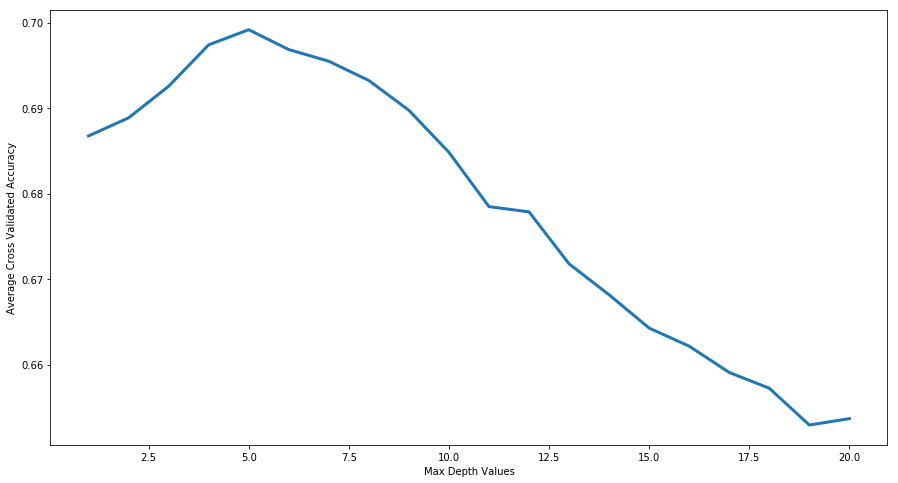

In [115]:
from sklearn.tree import DecisionTreeClassifier

depths = range(1, 21)
cv_scores = []

for i in depths:
    cv = cross_val_score(DecisionTreeClassifier(max_depth=i), X, y, cv =5, scoring="accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.figure(figsize=(15, 8))
plt.plot(depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy");


In [124]:
from sklearn.tree import DecisionTreeClassifier

airline_model = DecisionTreeClassifier(max_depth=5)
airline_model.fit(X, y)
preds = airline_model.predict(X)

In [125]:
#Score the model.
airline_model.score(X, y)

0.7056010928961749

### 5. Display the confusion matrix.
- What reviews are difficult to identify?

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, preds)

array([[8825,   68,  285],
       [2568,  184,  347],
       [ 956,   86, 1321]])

In [130]:
pd.crosstab(y,preds)
#347 positive predictions that were actually neutral
#2568 negative predictions that were actually neutral
#Neutral reviews were the hardest to predict

col_0,negative,neutral,positive
airline_sentiment,,,
negative,8825,68,285
neutral,2568,184,347
positive,956,86,1321


### 6. Print the classification report and discuss the characteristics of the model.

## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released post July 6, 2019 and use the model to predict how much revenue those movies will bring in.

In [47]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [48]:
movies.dropna(inplace = True)

In [49]:
movies.corr().loc["gross"].sort_values()

facenumber_in_poster        -0.032025
title_year                   0.054808
aspect_ratio                 0.063946
budget                       0.099496
director_facebook_likes      0.138351
actor_1_facebook_likes       0.144010
imdb_score                   0.214740
cast_total_facebook_likes    0.235601
duration                     0.245726
actor_2_facebook_likes       0.252842
actor_3_facebook_likes       0.299864
movie_facebook_likes         0.366933
num_critic_for_reviews       0.464187
num_user_for_reviews         0.544674
num_voted_users              0.624949
gross                        1.000000
Name: gross, dtype: float64

In [50]:
### SCIKIT-LEARN ###

from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['num_voted_users','num_user_for_reviews','num_critic_for_reviews', 
                'movie_facebook_likes']
X = movies[feature_cols]
y = movies.gross

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)


11149662.704671249
[ 2.14250702e+02  1.92288142e+04  7.48980828e+04 -2.39154584e+01]


In [51]:
linreg.score(X, y)

0.40910693384313046

In [52]:
#Higher correlcated variables
preds = linreg.predict(X)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mean_squared_error(y, preds)**.5

54045845.29154446

In [53]:
#Predictive variables I could find on the internet
feature_cols = ['movie_facebook_likes','actor_3_facebook_likes','actor_2_facebook_likes', 
                'actor_1_facebook_likes', 'duration', 'budget']
X = movies[feature_cols]
y = movies.gross

linreg = LinearRegression()
linreg.fit(X, y)

preds = linreg.predict(X)
mean_squared_error(y, preds)**.5

62427539.29305004

In [54]:
linreg.score(X, y)

0.21161800070897674

In [55]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

-16388270.764790565
[8.76416925e+02 5.94771346e+03 1.06667989e+03 1.26544389e+02
 4.72820372e+05 2.04640307e-02]


In [56]:
spiderman = [[63052, 18397, 9544, 10972128, 135, 160000000]]


In [57]:
X.columns

Index(['movie_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_facebook_likes', 'actor_1_facebook_likes', 'duration',
       'budget'],
      dtype='object')

Spiderman:
Budget $160M
63,052 Movie Facebook Likes
18,397 Tom Holland (actor 3) Facebook Likes
9,544 Angourie Rice (actor 2) Facebook Likes
10,972,128 Zendaya (actor 1) Facebook Likes
Duration = 135 minutes

In [58]:
linreg.predict(spiderman)

array([1.61403827e+09])

Once Upon A Time:
Budget $100M
106,371 Movie Facebook Likes
112,494 Brad Pitt (actor 3)
16,757,923 Leonardo DeCaprio (actor 2) Facebook Likes
1,654,508  Margot Robbie (actor 1) Facebook Likes
Duration = 165 minutes

In [59]:
once = [[106371, 112494, 16757923, 1654508, 165, 100000000]]
linreg.predict(once)

array([1.89106891e+10])

Lion King:
Budget $250M
23,306,140 Movie Facebook Likes
61,845,093 Beyonce (actor 3)
1,578,134 Donald Glover (actor 2) Facebook Likes
126,909 Seth Rogen (actor 1) Facebook Likes
Duration = 118 minutes

In [60]:
lion = [[23306140, 61845093, 1578134, 126909, 118, 250000000]]
linreg.predict(lion)

array([3.90006731e+11])